# King County Housing Data - Linear Regression

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [4]:
!pip3 uninstall seaborn

Uninstalling seaborn-0.9.0:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/seaborn-0.9.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/seaborn/*
Proceed (y/n)? n


In [5]:
# restart runtime after running cell
!pip3 --no-cache-dir install seaborn

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

from mpl_toolkits.mplot3d import axes3d, Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
y = df['price']
x = df['sqft_living']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

# reshape x, y data to fit library expectations
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)


print('Training data shape for x and y',x_train.shape, y_train.shape)
print (' \n\nTesting data shape for x and y',x_test.shape, y_test.shape)



Training data shape for x and y (10806, 1) (10806, 1)
 

Testing data shape for x and y (10807, 1) (10807, 1)


In [0]:
# fit to model

model = LinearRegression()

fit_model = model.fit(x_train, y_train)

predictions_x = model.predict(y_test)
predictions_y = model.predict(x_test)



In [9]:
print("Coefficient for predicted sqft_living: ", 
      fit_model.coef_)

print("\nIntercept Value: ", fit_model.intercept_)

Coefficient for predicted sqft_living:  [[292.94517302]]

Intercept Value:  [-66896.06850129]


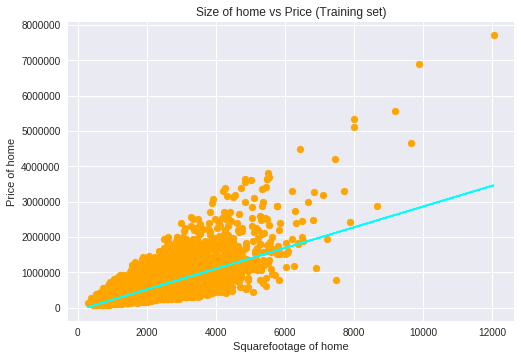

In [10]:
plt.scatter(x_train, y_train, color = 'orange')
plt.plot(x_train, model.predict(x_train), color = 'cyan')
plt.title('Size of home vs Price (Training set)')
plt.xlabel('Squarefootage of home')
plt.ylabel('Price of home')


plt.show()

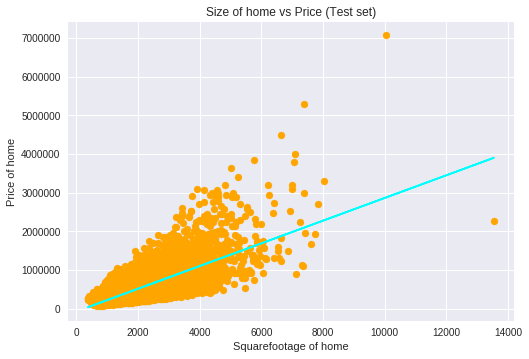

In [11]:
plt.scatter(x_test, y_test, color = 'orange')
plt.plot(x_test, model.predict(x_test), color = 'cyan')
plt.title('Size of home vs Price (Test set)')
plt.xlabel('Squarefootage of home')
plt.ylabel('Price of home')

plt.show()

#Visualization of Linear Fitting Variance

The variance of the test data set's linear best fit **looks** minimal compared to the training data's, so we can naively assume that it's a well fitting model. We should of course verify our results. 

In [12]:
housing_mse = mean_squared_error(y_test, predictions_y)

print("Mean squared error: %.2f"
      % housing_mse)

print('Root mean square error: %.2f' % np.sqrt(housing_mse))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions_y))

Mean squared error: 65561692418.77
Root mean square error: 256050.18
Variance score: 0.48


# Don't trust your eyeballs, but do use them

As you can see, the actual variance score is sub .5, which is a pretty significant amount of unexplained variance, but we should also  wonder if this is a result of our outliers. There is an incredibly large cluster of price to square footage with a large smattering of outliers, so we might actually be okay with not being able to explain a large amount of variance for the model. For example the training data goes all the way up to 14k square feet for a home, while the test data stops near 10k. However, that means we need to reasses either our data or the model itself. 

# Bane of a data scientist.

It'd be awfully convenient to implicilty understand if all of your data is a valid representation of a population, in this case the housing market's price to home square footage. But there's no real way to know that from these two variables. There's no one to tell you to drop the outliers, or to try a different model, or to tweak your linear regression. So you have to decide for yourself. You can use your intuition, or you can use tools to help you decide. I'm not going to bother right this moment since we use more features in a moment.

# Methods aside, what does it mean

There is something we can determine from our visualizations compared to our variance score.
Because the distance of so many high priced homes are so far away from the best plotted line, with the **vast majority ** appearing quite close to the linear fit, we could venture to say the model is accurate at predicting the price of a home that falls within our large cluster(although we need to remove the outliers, because it is skewing the linear fit, you can visually see that quite easily from the plots), and fails to predict homes with very large square footage. Luckily for whoever wants to use this model to sell a home, we have proof that the majority of home buyer's fit within a very finite set of parameters(considering only square footage as an indictator of price..)

Which brings me to the next point, this is one variable out of many, and while we could run analysis on it all day, we really should be moving along to include more features. 

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [13]:
##### Your Code Here #####


y = df['price']
x = df.filter(['sqft_living','bedrooms'])


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)


# fit to model

model = LinearRegression()

fit_model = model.fit(x_train, y_train)

y_test = y_test.values.reshape(-1, 1)

print("Coefficients: ", 
      fit_model.coef_)

print("\nIntercept Value: ", fit_model.intercept_)






Coefficients:  [   300.97957121 -53066.43318578]

Intercept Value:  90998.88119447127


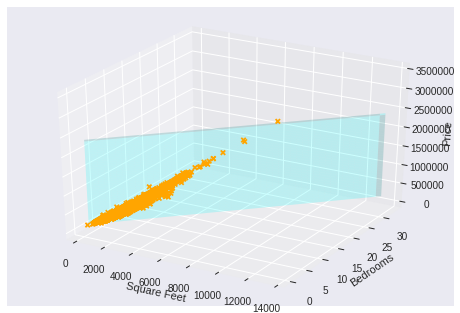

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Generate 3dim mesh data
x_surf = np.arange(0, 12000, 2000)                # generate a mesh
y_surf = np.arange(0, 10, 1)






X = np.arange(x_train['sqft_living'].min(), x_train['sqft_living'].max(), 
              (x_train['sqft_living'].max()- x_train['sqft_living'].min())/1000)
Y = np.arange(x_train['bedrooms'].min(), x_train['bedrooms'].max(), 
              (x_train['bedrooms'].max()- x_train['bedrooms'].min())/1000)
Z = fit_model.predict(np.hstack([X.reshape(-1,1), Y.reshape(-1,1)]))

ax.plot_surface(X=X,
                Y=Y,
                Z=Z.reshape(-1,1),
                alpha=0.2,
                color='cyan')



ax.scatter(x_test['sqft_living'], x_test['bedrooms'], model.predict(x_test), 
           c='orange', marker='x',
           alpha=1)

ax.set_xlabel('Square Feet')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')





plt.show()

In [0]:
predictions_y = model.predict(x_test)

housing_mse = mean_squared_error(y_test, predictions_y)

print("Mean squared error: %.2f"
      % housing_mse)

print('Root mean square error: %.2f' % np.sqrt(housing_mse))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions_y))

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [0]:


y = copy['price']
x = df.drop(['price', 'date'], axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = LinearRegression()

fit_model = model.fit(x_train, y_train)

y_test = y_test.values.reshape(-1, 1)

print("Coefficients: ", 
      fit_model.coef_)

print("\nIntercept Value: ", fit_model.intercept_)


In [0]:
predictions_y = model.predict(x_test)

housing_mse = mean_squared_error(y_test, predictions_y)

print("Mean squared error: %.2f"
      % housing_mse)

print('Root mean square error: %.2f' % np.sqrt(housing_mse))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions_y))


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
